In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120}) # Set fig size

In [2]:
# Read CSV
data_yearly = pd.read_csv('../data/price_daily.csv')
data_yearly.empty

False

In [3]:
# Add columns
data = data_yearly.rename(columns={'Date': 'ds', 'Price': 'y'})
data.head(5)

,ds,y
0,2019-12-09,2.17
1,2019-12-06,2.31
2,2019-12-05,2.42
3,2019-12-04,2.43
4,2019-12-03,2.42


In [4]:
# Create Model, fit data, set uncertainty interval to 95% (default 80%)

model=Prophet(interval_width=0.95)
model.fit(data)

# Set period, frequency 
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
5773,2020-08-01,3.519612,1.385631,5.764222
5774,2020-09-01,2.677025,0.114112,5.145578
5775,2020-10-01,2.624169,0.157433,5.222933
5776,2020-11-01,3.655164,0.913776,6.710309
5777,2020-12-01,3.140708,-0.043881,6.029189


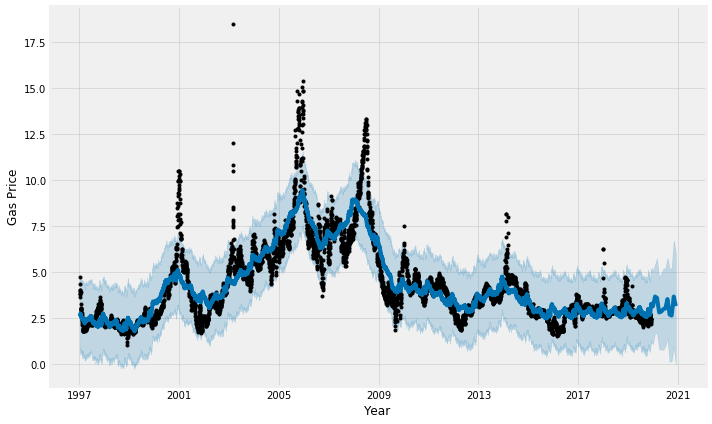

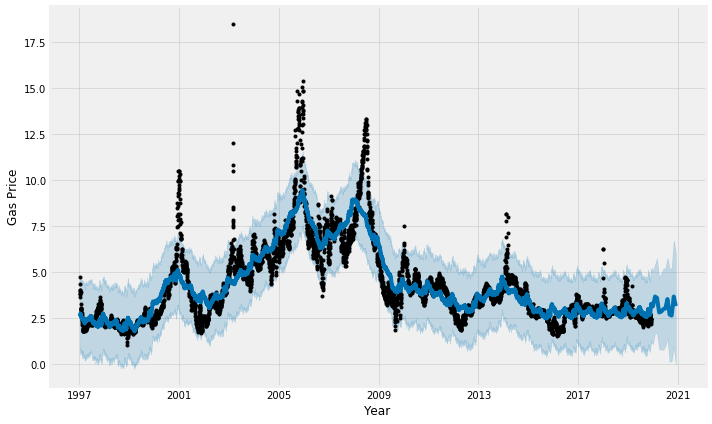

In [5]:
model.plot(forecast,xlabel='Year', ylabel='Gas Price') #Visualize forecast

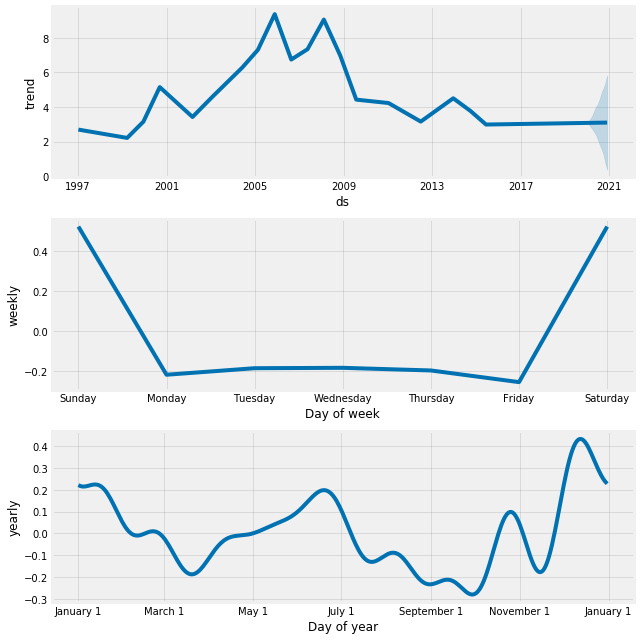

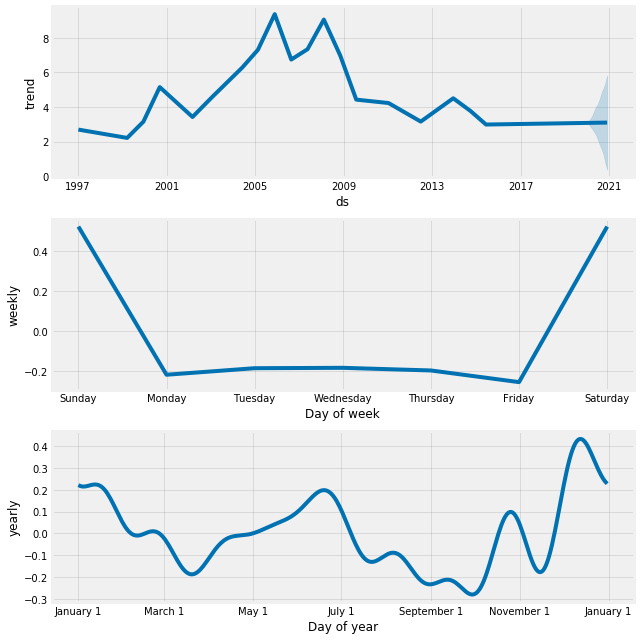

In [6]:
model.plot_components(forecast) # Display components

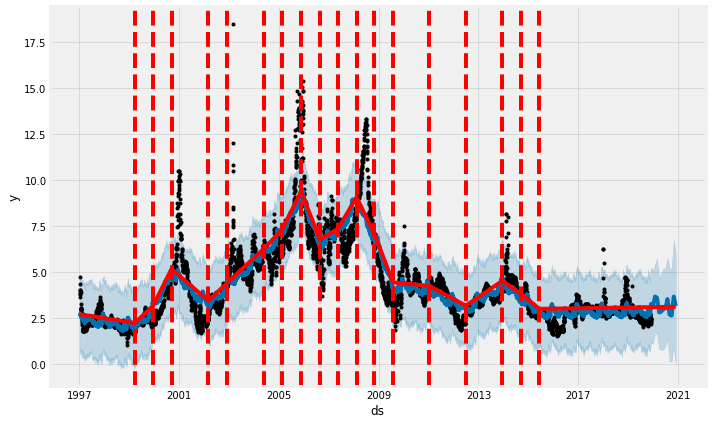

In [7]:
# Trend Change Points
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model,forecast)

In [8]:
# Cross validate data
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='4745 days', period='365 days', horizon = '720 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2010-12-21 00:00:00 and 2017-12-19 00:00:00


In [9]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,75 days,1.972725,1.404537,1.178228,0.367263,0.9375
1,76 days,1.976613,1.405921,1.181719,0.366942,0.9375
2,77 days,1.974723,1.405248,1.181955,0.365268,0.9395
3,78 days,1.972549,1.404475,1.182283,0.365380,0.9400
4,79 days,1.972643,1.404508,1.182946,0.365967,0.9400
